<a href="https://colab.research.google.com/github/kevinsen-git/TF_Basics/blob/main/Modelling_a_Genrated_Sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generate a fixed sequence of numbers and try finding the simplest, most accurate model 

#### 1. Generate the sequence of 1,000 numbers
#### 2. Split into 80% training + 20% testing 
#### 3. Try various models 
#### 4. Plot the estimates
#### 5. Fine tune the models 
#### 6. Try a bit of over fitting 
#### 7. Redo with some gaps in the data
#### 8. Redo with some added noise in the data 

**[Possible Tuning Methods for models]**

1. ***Change learning rate***
2. ***Change number of epochs***
3. ***Add dense layers***
4. ***Add neurons per layer*** 
5. ***Change activation function***
6. ***Change optimizer***
7. ***Change loss function***
8. ***Use more training data***


In [154]:
# Do the imports and initial setup 
# Need to have the following as global variables 
def my_setup() :
  global tf, np, plt, tfp
  import tensorflow as tf 
  import numpy as np 
  import matplotlib.pyplot as plt 
  import tensorflow_probability as tfp
  tf.random.set_seed(42)
  
 

In [155]:
# Function to show names and versions of the stuff I am using
def my_modules():
  print("tf =",tf.__version__,"| np =",np.__version__,"| tfp =",tfp.__version__)
#pip show tensorflow matplotlib numpy
#pip list 

In [156]:
# Function to do basic stats on a simple tensor 
def my_stats(data):
  print("Min = ",tf.math.reduce_min(data))
  print("Q25 = ",tfp.stats.percentile(data, 25))
  print("Q50 = ",tfp.stats.percentile(data, 50))
  print("Q90 = ",tfp.stats.percentile(data, 90))
  print("Max= ",tf.math.reduce_max(data))
  print("Mean = ",tf.math.reduce_mean(data))
  print("Std Dev = ",tfp.stats.stddev(data))
  print()

In [244]:
# Function to calculate the mean absolute error and the mean squared error 
def my_mae_mse(y_test,y_pred):
  mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
  mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
  print ('mae = ',mae.numpy(),'| mse = ',mse.numpy())

In [157]:
# Create plotting function
def plot_predictions(train_data,train_labels,test_data,test_labels,predictions):
  # The doc string 
  """
  Plots the training data and the ground truth vs the prediction
  """
  # Ctrl + Shift + space - will show the docstring in colab jupyter notebooks 
  plt.figure(figsize=(15,10))
  # Plot the training data in blue 
  plt.scatter(train_data,train_labels,c='b',label='Training Data')
  # Plot the test data in green
  plt.scatter(test_data,test_labels,c='g',label="Test data")
  # Plot the predictions in red 
  plt.scatter(test_data,predictions,c='r', label="Predictions")
  # Show legend
  plt.legend()

In [158]:
my_setup()


In [159]:
my_modules()

tf = 2.6.0 | np = 1.19.5 | tfp = 0.14.1


In [160]:
# Generate the dataset 
# X_train, y_train, X_test, y_test 
# Using tf.range

X = tf.range(start=1.0, limit=3000, delta=2)
y = tf.range(start=100.0, limit=3100, delta=2)
# y= X + 100
X.shape, y.shape


(TensorShape([1500]), TensorShape([1500]))

In [161]:
# Now split into training 1000 and test 500 
# Preserve the order initially 
X_train = X[:1000]
y_train = y[:1000]
X_test = X[1000:]
y_test = y[1000:]
y_pred = y_test + 200


In [163]:
# Show basic stats
my_stats(X_train)
my_stats(X_test)
my_stats(y_train)
my_stats(y_test)



Min =  tf.Tensor(1.0, shape=(), dtype=float32)
Q25 =  tf.Tensor(501.0, shape=(), dtype=float32)
Q50 =  tf.Tensor(1001.0, shape=(), dtype=float32)
Q90 =  tf.Tensor(1799.0, shape=(), dtype=float32)
Max=  tf.Tensor(1999.0, shape=(), dtype=float32)
Mean =  tf.Tensor(1000.0, shape=(), dtype=float32)
Std Dev =  tf.Tensor(577.35, shape=(), dtype=float32)

Min =  tf.Tensor(2001.0, shape=(), dtype=float32)
Q25 =  tf.Tensor(2251.0, shape=(), dtype=float32)
Q50 =  tf.Tensor(2501.0, shape=(), dtype=float32)
Q90 =  tf.Tensor(2899.0, shape=(), dtype=float32)
Max=  tf.Tensor(2999.0, shape=(), dtype=float32)
Mean =  tf.Tensor(2500.0, shape=(), dtype=float32)
Std Dev =  tf.Tensor(288.67456, shape=(), dtype=float32)

Min =  tf.Tensor(100.0, shape=(), dtype=float32)
Q25 =  tf.Tensor(600.0, shape=(), dtype=float32)
Q50 =  tf.Tensor(1100.0, shape=(), dtype=float32)
Q90 =  tf.Tensor(1898.0, shape=(), dtype=float32)
Max=  tf.Tensor(2098.0, shape=(), dtype=float32)
Mean =  tf.Tensor(1099.0, shape=(), dtype=fl

In [194]:
# Fit the first model 
# One layer 
# With smell/default learning rate it is TERRIBLE !
# Create the model
model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics = ["mae"])

# Fit the model
model.fit(X_train, y_train, epochs = 10)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
32/32 [==============================] - 0s 1ms/step - loss: 824.1678 - mae: 824.1678
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 792.3194 - mae: 792.3194
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 760.4995 - mae: 760.4995
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 728.5370 - mae: 728.5370
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 696.6542 - mae: 696.6542
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 664.9564 - mae: 664.9564
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 633.0961 - mae: 633.0961
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 601.1589 - mae: 601.1589
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 569.3857 - mae: 569.3857
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 537.4905 - mae: 537.4905


In [195]:
# Get mae_mse
my_mae_mse(y_test, y_pred)

# Predict and plot 
y_pred = model.predict(X_test)



In [196]:
# Show basic stats
my_stats(X_train)
my_stats(X_test)
my_stats(y_train)
my_stats(y_test)
my_stats(y_pred)



Min =  tf.Tensor(1.0, shape=(), dtype=float32)
Q25 =  tf.Tensor(501.0, shape=(), dtype=float32)
Q50 =  tf.Tensor(1001.0, shape=(), dtype=float32)
Q90 =  tf.Tensor(1799.0, shape=(), dtype=float32)
Max=  tf.Tensor(1999.0, shape=(), dtype=float32)
Mean =  tf.Tensor(1000.0, shape=(), dtype=float32)
Std Dev =  tf.Tensor(577.35, shape=(), dtype=float32)

Min =  tf.Tensor(2001.0, shape=(), dtype=float32)
Q25 =  tf.Tensor(2251.0, shape=(), dtype=float32)
Q50 =  tf.Tensor(2501.0, shape=(), dtype=float32)
Q90 =  tf.Tensor(2899.0, shape=(), dtype=float32)
Max=  tf.Tensor(2999.0, shape=(), dtype=float32)
Mean =  tf.Tensor(2500.0, shape=(), dtype=float32)
Std Dev =  tf.Tensor(288.67456, shape=(), dtype=float32)

Min =  tf.Tensor(100.0, shape=(), dtype=float32)
Q25 =  tf.Tensor(600.0, shape=(), dtype=float32)
Q50 =  tf.Tensor(1100.0, shape=(), dtype=float32)
Q90 =  tf.Tensor(1898.0, shape=(), dtype=float32)
Max=  tf.Tensor(2098.0, shape=(), dtype=float32)
Mean =  tf.Tensor(1099.0, shape=(), dtype=fl

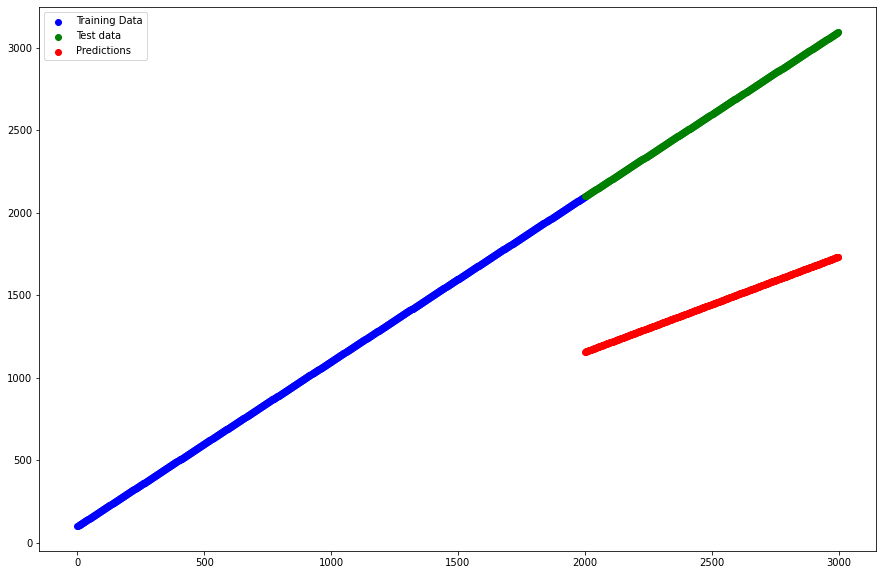

In [197]:
# Plot 
plot_predictions(X_train, y_train, X_test, y_test, y_pred)


Epoch 1/10
32/32 [==============================] - 0s 1ms/step - loss: 527.9590 - mae: 527.9590
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 209.4737 - mae: 209.4737
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 46.2845 - mae: 46.2845
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 40.8182 - mae: 40.8182
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 40.7272 - mae: 40.7272
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 40.5878 - mae: 40.5878
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 41.1933 - mae: 41.1933
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 40.6870 - mae: 40.6870
Epoch 9/10
32/32 [==============================] - 0s 1000us/step - loss: 40.6051 - mae: 40.6051
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 40.4386 - mae: 40.4386


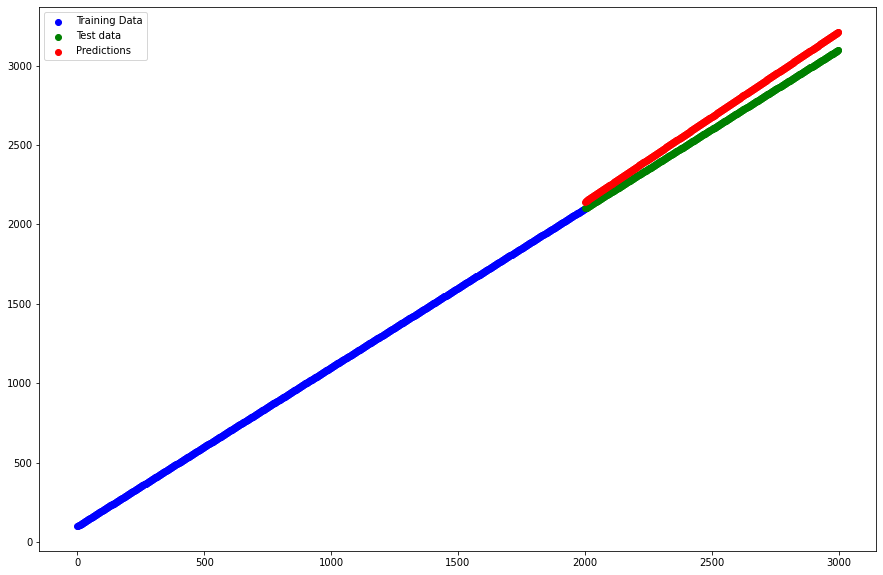

In [201]:
# Fit the second model 
# One layer 
# With large learning rate it is much better 
# Create the model
model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

# Fit the model
model.fit(X_train, y_train, epochs = 10)

# Predict 
y_pred = model.predict(X_test)

# Get mae_mse
my_mae_mse(y_test, y_pred)

# Plot 
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

Epoch 1/10
32/32 [==============================] - 0s 1ms/step - loss: 18894.8125 - mae: 18894.8125
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 8561.8867 - mae: 8561.8867
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 14866.1621 - mae: 14866.1621
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 19701.4688 - mae: 19701.4688
Epoch 5/10
32/32 [==============================] - 0s 1ms/step - loss: 16592.4316 - mae: 16592.4316
Epoch 6/10
32/32 [==============================] - 0s 1ms/step - loss: 19683.4062 - mae: 19683.4062
Epoch 7/10
32/32 [==============================] - 0s 1ms/step - loss: 7397.1826 - mae: 7397.1826
Epoch 8/10
32/32 [==============================] - 0s 1ms/step - loss: 14915.6309 - mae: 14915.6309
Epoch 9/10
32/32 [==============================] - 0s 1ms/step - loss: 12542.6777 - mae: 12542.6777
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 14571.8535 - mae: 1457

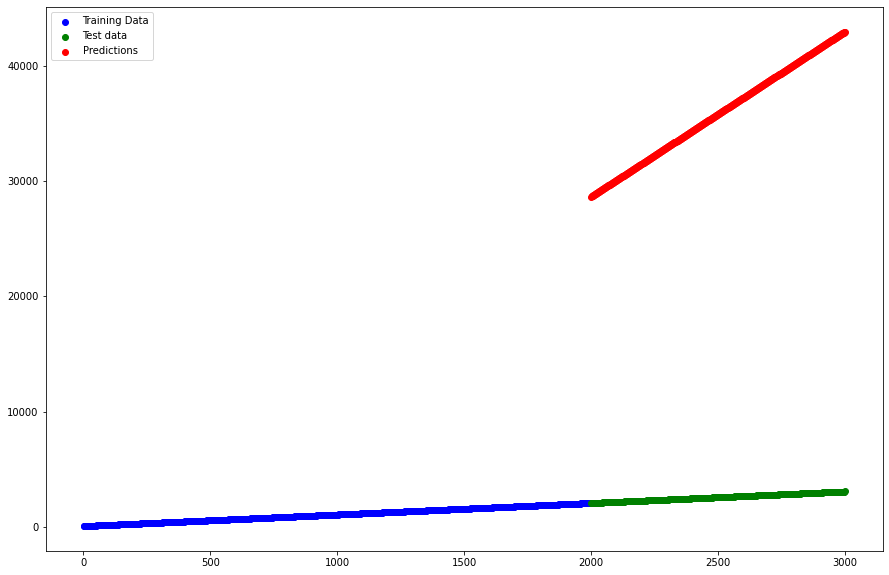

In [245]:
# Fit the third model 
# One layer 
# With large learning rate it is much better 
# Create the model
model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=100.0),
              metrics = ["mae"])

# Fit the model
model.fit(X_train, y_train, epochs = 10)

# Predict 
y_pred = model.predict(X_test)

# Get mase_mse
my_mae_mse(y_test, y_pred)

# Plot 
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [240]:
# Calculate the mean absolute error and the mean squared error 
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
print ('mae = ',mae.numpy(),'| mse = ',mse.numpy())

mae =  11.80467 | mse =  149.70927


16/16 [==============================] - 0s 1ms/step - loss: 11.8047 - mae: 11.8047


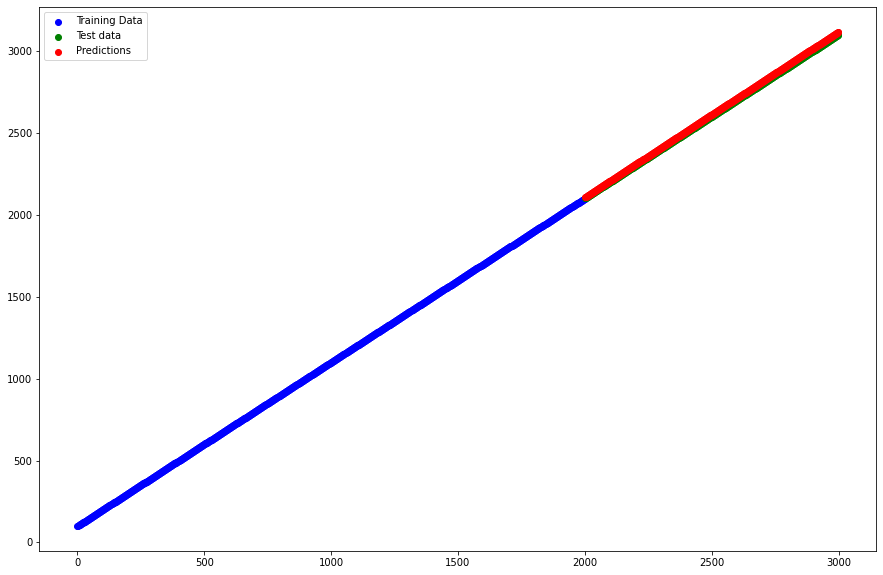

In [213]:
# Fit the fourth model 
# One layer 
# With large learning rate it is much better 
# Create the model
model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

# Model Summry
model.summary

# Fit the model
model.fit(X_train, y_train, epochs = 300, verbose=0)

# Predict 
y_pred = model.predict(X_test)

# Evaluate
model.evaluate(X_test, y_test)

# Get mae_mse
my_mae_mse(y_test, y_pred)


# Plot 
plot_predictions(X_train, y_train, X_test, y_test, y_pred)